# Project: Investigate a Dataset  No-show appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**this dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.** 

A number of characteristics about the patient are included in each row.<br>
‘ScheduledDay’ tells us on what day the patient set up their appointment.<br>
‘Neighborhood’ indicates the location of the hospital.<br>
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>

### Importing data analysis packages
<strong> the following data analytics packages:</strong>
 <ul>
    <li>Pandas. Provides flexible data structures designed to make working with “relational” or “labeled” data intuitive.</li><li>Numpy. Provides functions to create and manipulate numerical data with speed.</li>
<li> Matplotlib. Provide publication quality figures in a variety of formats with just a few lines of code.</li>
<li> Seaborn. provides a high-level interface for drawing attractive and informative statistical graphics.</li>
    </ul>

 ### Import statements for all of the packages that will be used

In [1]:
# import all the packages.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the data.  
df=pd.read_csv('noshowappointments.csv')
# print out a few lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###### Observation -- Should change the mispelled columns and use underscores for easier reading 

In [3]:
#  types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


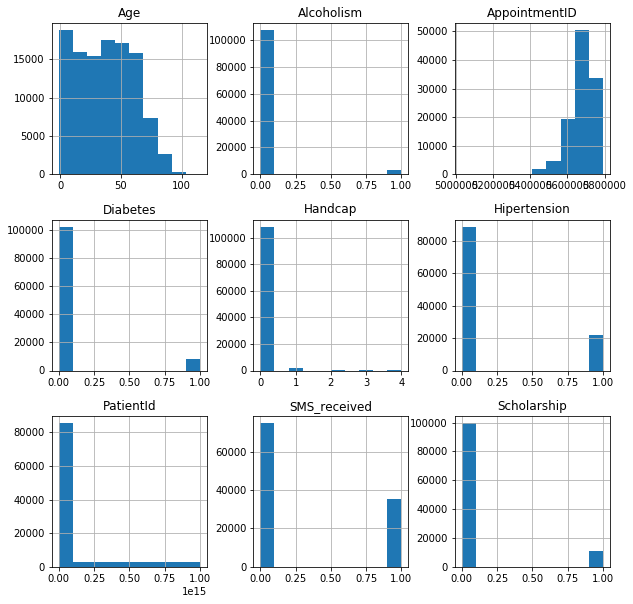

In [4]:
df.hist(figsize=(10,10));

<strong>observations the are things to be changes:</strong>
<br/>schedule_day and appointment_day to date by removing time and changing columens names to schedule_date and appointment_date
<br/> patientID data type from float to int 



### Data Cleaning 



In [5]:
sum(df.duplicated())

0

<strong> No duplicated data.</strong>

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<strong>the patient min age is -1 which is impossible</strong>

# Cleaning the data
   <strong>  1- renaming the mispelled columen and adding underscores instead of spaces</strong> <br>
   for reading and working ease, renaming  schedule_day and 	appointment_day to appointment_date and schedule_date  because schedule_day and appointment_day are more suitable for day of the week that will be in the next steps

In [7]:
labels = ['patient_ID', 'appointment_ID', 'gender', 'schedule_date', 'appointment_date', 'age', 'neighborhood',
          'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = labels
df.head(1)

,patient_ID,appointment_ID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


   <strong> 2- Converting no_show from Yes, No to 1, 0 </strong> <br>
   that  no_show be repersented in graph

In [8]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)

In [9]:
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

 no_show now is int data 1 repersent not Showing to the appointment

<strong> 3- Changed patiend_ID data type from float to int</strong><br>
:) removing the scientific notation which is unnecessary to representing an ID

In [10]:
df['patient_ID']=df['patient_ID'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_ID          110527 non-null int64
appointment_ID      110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null object
appointment_date    110527 non-null object
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null int64
dtypes: int64(10), object(4)
memory usage: 11.8+ MB


<strong>4- Fixing the ages that are -1 to be equal to the mean </strong>

In [13]:
mean=df['age'].mean().astype(int);
df['age']=df['age'].replace(-1,mean)
df['age'].describe()

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_ID          110527 non-null int64
appointment_ID      110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


<strong>3- Convert appointment_day, schedule_day to datetime </strong><br>  
:) covert the string which is time to datatime dateType for both the appointment_day and the schedule_day 

In [18]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_ID          110527 non-null int64
appointment_ID      110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


In [19]:
df['schedule_date'] = pd.to_datetime(df['schedule_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_ID          110527 non-null int64
appointment_ID      110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


<strong>  4- removing time from appointment_date, schedule_date</strong> <br>
removing the time from both the appointment_date, schedule_date since time has no use here

In [20]:
df['appointment_date']=df['appointment_date'].apply(lambda a: a.strftime('%m-%d-%Y')) 

In [21]:
df['schedule_date'] = df['schedule_date'].apply(lambda s: s.strftime('%m-%d-%Y'))

In [22]:
df.head()

,patient_ID,appointment_ID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,04-29-2016,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,04-29-2016,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<strong> 5- Creating  columns for day of week for both schedule_date and appointment_date</strong> <br>
by converting date to datetime, then getting the date to day of week.

In [23]:
df['schedule_date'] = pd.to_datetime(df['schedule_date'])

In [24]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [25]:
df['schedule_day'] = df['schedule_date'].dt.weekday_name
df['appointment_day'] = df['appointment_date'].dt.weekday_name
df.head()

,patient_ID,appointment_ID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,appointment_day
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


### Dataframe to be used 
<strong>Create new datafram as:</strong>
    <br>1-Records of all the show.
    <br>2-Records of all the no show change the datatype string to int.

Creating new column of days between the appoitment and the scheuled dates

In [26]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [27]:
df['schedule_date'] = pd.to_datetime(df['schedule_date'])

In [28]:
df['between_days'] = df['appointment_date'] - df['schedule_date']

create df for reusing all the no show data

In [29]:
df_no_shows = df.query('no_show == "1"')
df_no_shows.head()

,patient_ID,appointment_ID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,appointment_day,between_days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,Friday,3 days
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,Friday,1 days
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,Friday,2 days


create df for reusing all the  show data

In [30]:
df_shows = df.query('no_show == "0"')
df_shows.head()

,patient_ID,appointment_ID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,appointment_day,between_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: What is the persntage of show vs no show? 

In [31]:
pielabels = ['Shows', 'No Shows']
piecolors = ['LightGrey', 'PowderBlue']
explode = (0.01, 0.09)

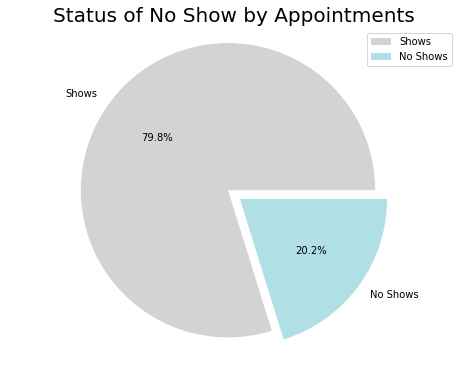

In [32]:
plt.pie(df.no_show.value_counts(), labels=pielabels, autopct='%1.1f%%', explode=explode, colors=piecolors)
plt.title('Status of No Show by Appointments', fontsize=20)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,6);
plt.legend();

from this plot we can see that 20.2 % of the patient didn't show for their appointment

### Question 2: what is the effect of the days between the Booking and Appointment day

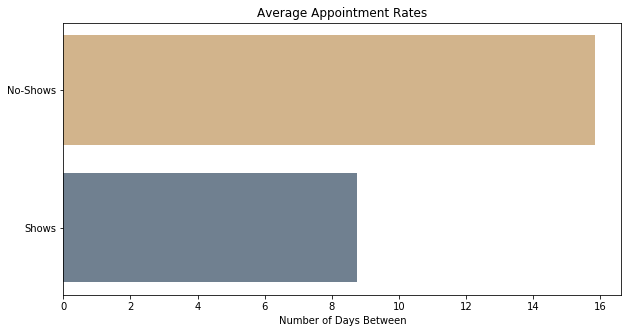

In [36]:
locations = [1, 2]
heights = [((df_shows['between_days'].mean()) / np.timedelta64(1, 'D')),\
           ((df_no_shows['between_days'].mean())/ np.timedelta64(1, 'D'))]
labels = ['Shows', 'No-Shows']

plt.barh(locations, heights, tick_label=labels, color=['SlateGrey','Tan'])
plt.title('Average Appointment Rates')
plt.xlabel('Number of Days Between');
fig = plt.gcf()
fig.set_size_inches(10,5);


here the plot the more day between the schedule day and appointment day the more like for people to no show

### Question 3: What day of most like to have the lagest number of no Show?

In [34]:
nos_mon = df_no_shows.query('appointment_day == "Monday"')['appointment_day'].count()
s_mon   = df_shows.query('appointment_day == "Monday"')['appointment_day'].count()

nos_tue = df_no_shows.query('appointment_day == "Tuesday"')['appointment_day'].count()
s_tue   = df_shows.query('appointment_day == "Tuesday"')['appointment_day'].count()

nos_wed = df_no_shows.query('appointment_day == "Wednesday"')['appointment_day'].count()
s_wed = df_shows.query('appointment_day == "Wednesday"')['appointment_day'].count()

nos_thu = df_no_shows.query('appointment_day == "Thursday"')['appointment_day'].count()
s_thu = df_shows.query('appointment_day == "Thursday"')['appointment_day'].count()

nos_fri = df_no_shows.query('appointment_day == "Friday"')['appointment_day'].count()
s_fri = df_shows.query('appointment_day == "Friday"')['appointment_day'].count()

nos_sat = df_no_shows.query('appointment_day == "Saturday"')['appointment_day'].count()
s_sat = df_shows.query('appointment_day == "Saturday"')['appointment_day'].count()

nos_sun = df_no_shows.query('appointment_day == "Sunday"')['appointment_day'].count()
s_sun = df_shows.query('appointment_day == "Sunday"')['appointment_day'].count()


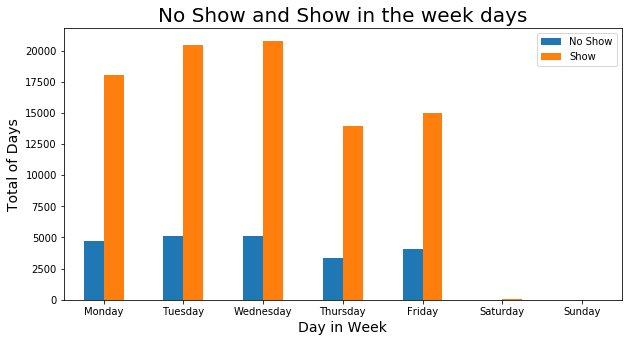

In [47]:
labels = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
locations = [1, 2, 3, 4, 5, 6, 7]

heights_nos = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
heights_s = [s_mon, s_tue, s_wed, s_thu, s_fri, s_sat, s_sun]

df_s = pd.DataFrame({'No Show': heights_nos,'Show': heights_s}, index=labels)

df_s.plot.bar(rot=0)

fig = plt.gcf()
plt.title('No Show and Show in the week days', fontsize=20)
plt.xlabel('Day in Week', fontsize=14)
plt.ylabel('Total of Days', fontsize=14)
fig.set_size_inches(10,5);

<strong>by this plot the max day for show are Mondays and for no show are Wednesdays</strong>

### Question 4: what is the persntage of no show for people with Hypertension? 

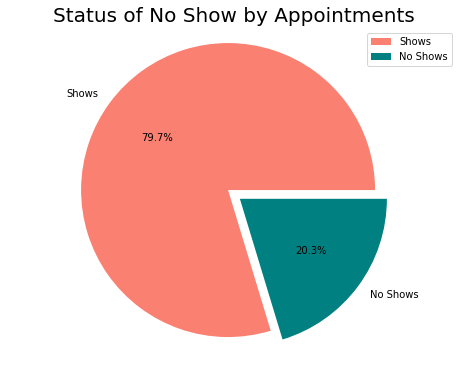

In [55]:
pielabels = ['Shows','No Shows' ]
noShow = df[df['hypertension'] ==1].no_show.value_counts()
piecolors = ['Salmon', 'Teal']
explode = (0.01, 0.09)
plt.pie(noShow, labels=pielabels, autopct='%1.1f%%', explode=explode, colors=piecolors)
plt.title('Status of No Show by Appointments', fontsize=20)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,6);
plt.legend();

<strong>from this pie plot we can see the 17.3% of patient with hypertension didn't show for their appointment.</strong>

### Question 5: what is the affect of sms on show and no show? 

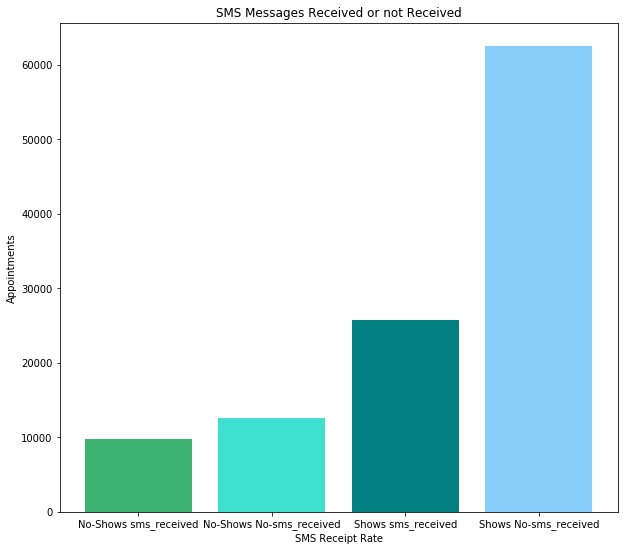

In [41]:
noshow_sms_count = df_no_shows.query('sms_received == 1')
no_sr = noshow_sms_count.shape[0]

noshow_sms_count = df_no_shows.query('sms_received == 0')
no_sno_r = noshow_sms_count.shape[0]

shows_sms_count = df_shows.query('sms_received == 1')
sr = shows_sms_count.shape[0]

shows_sms_count = df_shows.query('sms_received == 0')
sno_r = shows_sms_count.shape[0]

locations = [1, 2, 3, 4]
heights = [no_sr, no_sno_r, sr, sno_r]
labels = ['No-Shows sms_received', 'No-Shows No-sms_received', 'Shows sms_received','Shows No-sms_received']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['MediumSeaGreen','Turquoise','Teal','LightSkyBlue'])
plt.title('SMS Messages Received or not Received')
plt.xlabel('SMS Receipt Rate')
plt.ylabel('Appointments');
fig = plt.gcf()
fig.set_size_inches(10,9);
plt.legend();

the data show that most of the people show to their appointment without receiving sms 

In [42]:
df['appointment_date'].value_counts()

2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: appointment_date, dtype: int64

<a id='conclusions'></a>
## Conclusions
><strong>My conclusion after investigating the no show medical appointment:</strong> 
    <br>1- the percentage of patient no showing to their appointments are 20.2% of the patient presented in the data.
    <br>2- 17.3% Patient with hypertension didn't show for their appointment.
    <br>3- 27.6% of patient who received SMS messages didn’t show for their appointments and 83.3% show for their appointment without receiving SMS messages.
<br>4- The less days between the schedule_date and appointment_date the stronger the probability of the patient showing to their appointments.



> ### Limitations:

>>1-	The is no health problem related to the appointments.<br>
2-	The is no data related to the weather on the appointment day.<br>
3-	The is no data related the distant between the hospital neighborhood and the patient and the traffic data. <br>
4-	That data is only for 27 days which are a day in the last of April, 20 days in May, 6 days of June, and this date frame is very small to determine the no show rating influence.<br>



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0